In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [14]:
data = []
labels = []
classes = 43


# cur_path = os.getcwd()
# print (os.getcwd())
# os.chdir("..")
# print(os.getcwd())
cur_path=r'C:\\Users\\mushirih\\Desktop\\projs\jupyter\\'


for i in range(classes):
    path = os.path.join(cur_path,'data','gtsrb-german-traffic-sign','Train',str(i))
    images = os.listdir(path)
    
    for a in images:
        try:
            image = Image.open(path+'\\'+a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error in loading image")
            
data = np.array(data)
labels = np.array(labels)

In [15]:
print(data[0])
print(labels[0])

[[[ 75  78  80]
  [ 74  76  78]
  [ 85  86  84]
  ...
  [ 68  75  74]
  [ 65  69  68]
  [ 66  67  66]]

 [[ 83  84  86]
  [ 80  80  82]
  [ 88  88  83]
  ...
  [ 73  77  78]
  [ 76  78  75]
  [ 80  80  78]]

 [[ 78  78  80]
  [ 86  85  86]
  [ 90  89  90]
  ...
  [ 71  74  71]
  [ 73  74  69]
  [ 78  78  74]]

 ...

 [[133 134 139]
  [123 127 132]
  [112 121 125]
  ...
  [ 94  95  89]
  [ 97  98  91]
  [ 99 103  99]]

 [[ 91  95  99]
  [ 91  98 103]
  [ 75  86  90]
  ...
  [104 102  96]
  [110 113 104]
  [ 96 104  98]]

 [[ 85  84  87]
  [ 95 101 107]
  [ 63  76  81]
  ...
  [103 103  95]
  [ 99 102  90]
  [ 90  97  89]]]
0


In [16]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

y_train = to_categorical(y_train,43)
y_test= to_categorical(y_test, 43)

print(y_train[0])

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [17]:
# build cnn

In [19]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=.25))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(Dropout(rate=.25))
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(rate = .5))
model.add(Dense(43, activation ='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
# train and validate
epochs = 15
history = model.fit(X_train, y_train, batch_size=64,epochs = epochs, validation_data=(X_test,y_test))

Train on 31367 samples, validate on 7842 samples
Epoch 1/15
31367/31367 [==============================] - 134s 4ms/step - loss: 1.3628 - accuracy: 0.6865 - val_loss: 0.1837 - val_accuracy: 0.9597
Epoch 2/15
31367/31367 [==============================] - 122s 4ms/step - loss: 0.3193 - accuracy: 0.9112 - val_loss: 0.0938 - val_accuracy: 0.9750
Epoch 3/15
31367/31367 [==============================] - 120s 4ms/step - loss: 0.2076 - accuracy: 0.9425 - val_loss: 0.0635 - val_accuracy: 0.9838
Epoch 4/15
31367/31367 [==============================] - 119s 4ms/step - loss: 0.1693 - accuracy: 0.9519 - val_loss: 0.0558 - val_accuracy: 0.9837
Epoch 5/15
31367/31367 [==============================] - 119s 4ms/step - loss: 0.1469 - accuracy: 0.9589 - val_loss: 0.1028 - val_accuracy: 0.9736
Epoch 6/15
31367/31367 [==============================] - 126s 4ms/step - loss: 0.1377 - accuracy: 0.9626 - val_loss: 0.0363 - val_accuracy: 0.9913
Epoch 7/15
31367/31367 [==============================] - 126s 

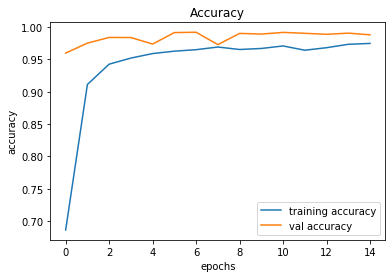

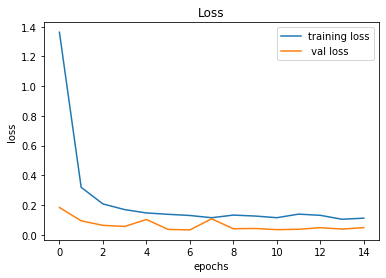

In [21]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'],label='training loss')
plt.plot(history.history['val_loss'], label =' val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [23]:
# Test model with test dataset
from sklearn.metrics import accuracy_score
import pandas as pd

path = os.path.join(cur_path,'data','gtsrb-german-traffic-sign','Test.csv')
    
y_test = pd.read_csv(path)
labels = y_test['ClassId'].values
imgs=y_test['Path'].values

data = []

for img in imgs:
    image = Image.open(os.path.join(cur_path,'data','gtsrb-german-traffic-sign',img))
    image = image.resize((30,30))
    data.append(np.array(image))
    
X_test = np.array(data)

pred = model.predict_classes(X_test)

accuracy_score(labels, pred)

0.9554235946159937

In [25]:
model.save('traffic_classifier.h5')